In [40]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
import ternary

print('Numpy version:', np.__version__)
print('Pandas version:',pd.__version__)

print('Matplotlib version:', matplotlib.__version__)
print("Ternary version:",ternary.__version__)

Numpy version: 1.17.4
Pandas version: 0.25.3
Matplotlib version: 3.1.3
Ternary version: 1.0.6


# DATA
## Enzyme

In [41]:
enzyme_base = pd.read_csv('Enzyme_tradeoff_20201.csv',index_col=0)
enzyme_base.head()

,0,1,2,3,4,5,6,7,8,9,...,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
Tax1,0.0,1.541601,1.490596,1.462430,1.431783,1.411574,1.401298,1.398800,1.419329,1.447490,...,0.219060,0.216382,0.213785,0.199773,0.197325,0.195058,0.192543,0.189879,0.187306,0.184829
Tax2,0.0,0.233644,0.230462,0.229650,0.228962,0.228386,0.225674,0.225306,0.225078,0.224922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,2.323268,2.264856,2.220813,2.175726,2.146627,2.150260,2.163521,2.171049,2.206955,...,7.475130,7.336060,7.187642,7.012483,6.879893,6.750246,6.621963,6.470608,6.346711,6.224216
Tax4,0.0,0.182814,0.182570,0.182834,0.184351,0.182418,0.184903,0.187420,0.191383,0.194759,...,22.446035,22.416157,22.363178,22.266695,22.223223,22.211048,22.038734,21.944881,21.899689,21.846040
Tax5,0.0,0.492399,0.489036,0.486232,0.484407,0.483285,0.482926,0.483047,0.484265,0.485712,...,0.639811,0.637683,0.631797,0.629498,0.627386,0.625584,0.617115,0.614673,0.612387,0.610157


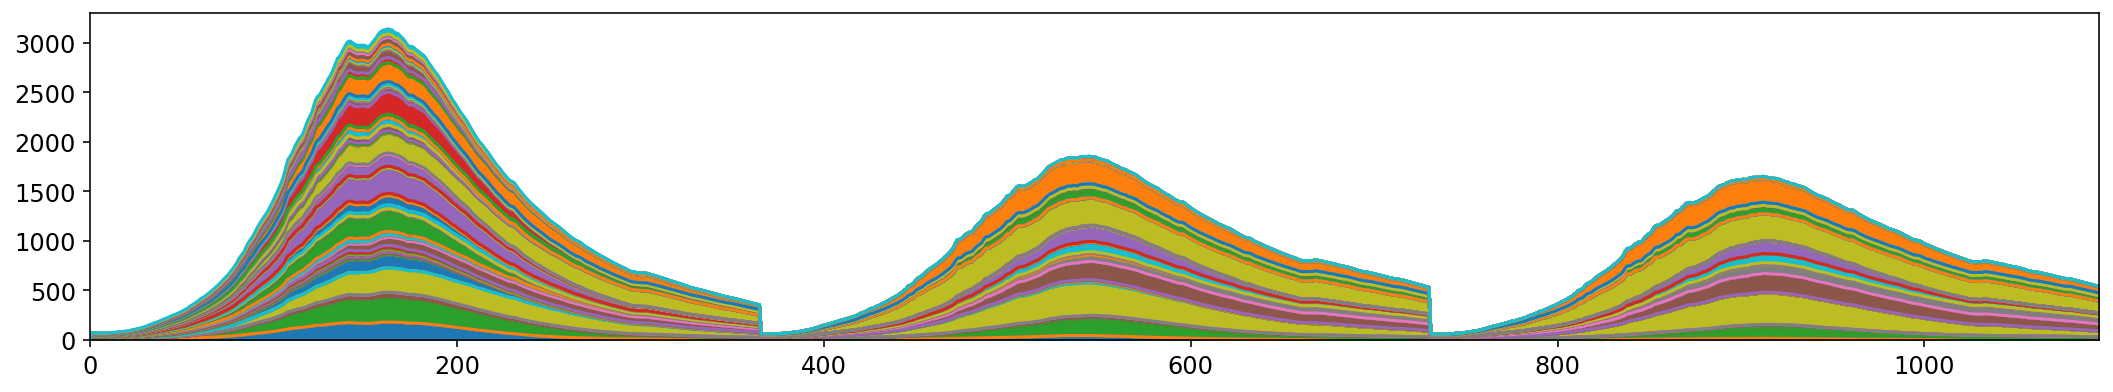

In [42]:
enzyme_base.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## Osmolyte

In [43]:
osmolyte_base = pd.read_csv('Osmolyte_tradeoff_20201.csv',index_col=0)
osmolyte_base.head()

,0,1,2,3,4,5,6,7,8,9,...,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
Tax1,0.0,0.000247,0.001714,0.003127,0.005197,0.006866,0.008548,0.009794,0.012020,0.013193,...,0.000656,0.000685,0.000675,0.000619,0.000618,0.000653,0.000545,0.000531,0.000530,0.000531
Tax2,0.0,0.000148,0.000238,0.000342,0.000507,0.000658,0.000808,0.000928,0.001118,0.001217,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,0.000245,0.003650,0.006542,0.010818,0.013988,0.017138,0.019206,0.023089,0.024650,...,0.023531,0.024268,0.024038,0.022866,0.022975,0.024221,0.020057,0.019335,0.018974,0.018954
Tax4,0.0,0.000192,0.001167,0.002246,0.003928,0.005390,0.006954,0.008162,0.010093,0.011151,...,0.527309,0.556003,0.560410,0.543611,0.557452,0.600465,0.502131,0.493112,0.493659,0.502958
Tax5,0.0,0.000370,0.000962,0.001649,0.002766,0.003775,0.004811,0.005599,0.006883,0.007532,...,0.004526,0.004752,0.004756,0.004611,0.004722,0.005050,0.004240,0.004147,0.004179,0.004248


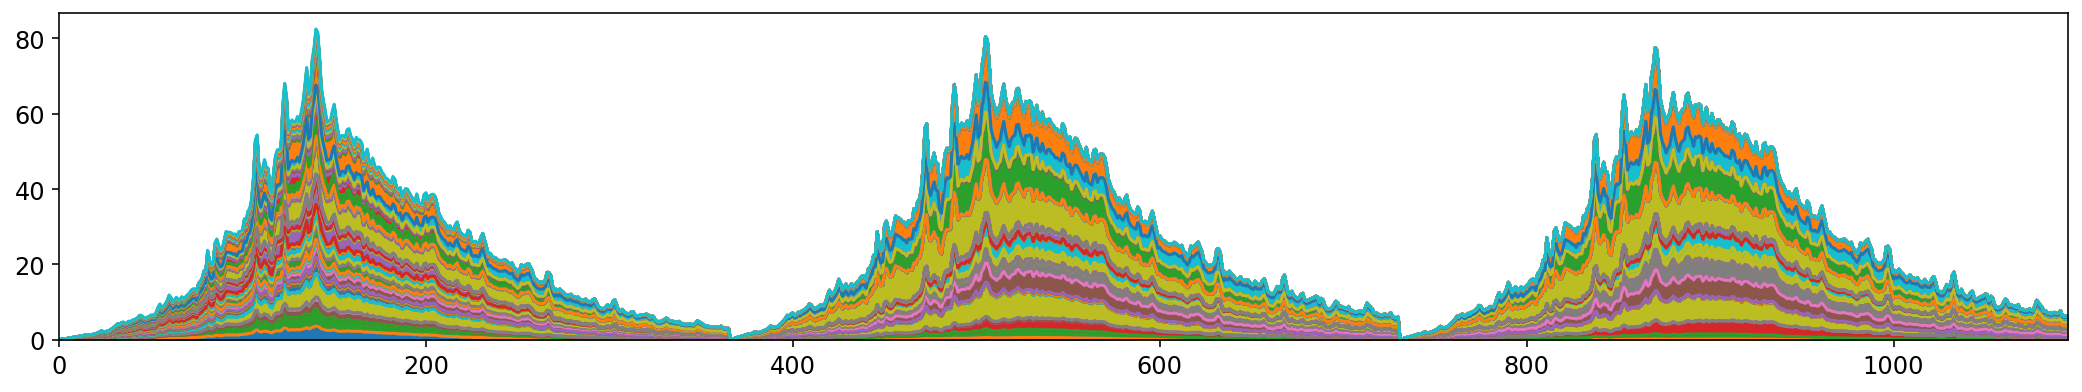

In [44]:
osmolyte_base.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## yield

In [45]:
yield_base = pd.read_csv('Yield_tradeoff_20201.csv',index_col=0)
yield_base.head()

,0,1,2,3,4,5,6,7,8,9,...,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
Tax1,0.0,-2.997457,-2.343377,-1.751534,-0.905738,-0.233017,0.424234,0.900726,1.701427,2.088791,...,-0.195685,-0.180821,-0.180048,-0.172952,-0.168382,-0.151609,-0.186662,-0.184174,-0.175640,-0.170093
Tax2,0.0,-0.422814,-0.388175,-0.353802,-0.300466,-0.251905,-0.199230,-0.160852,-0.100650,-0.069058,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,-3.394895,-2.613273,-1.953399,-1.007260,-0.312721,0.328623,0.733422,1.519158,1.786304,...,-6.351596,-6.016411,-5.857142,-5.840688,-5.625063,-5.197558,-5.838861,-5.715445,-5.525558,-5.347566
Tax4,0.0,-0.848852,-0.665378,-0.463864,-0.154772,0.129590,0.411529,0.626160,0.969718,1.152128,...,-11.527335,-6.499218,-5.748485,-8.551581,-5.875702,1.737482,-15.407524,-15.617456,-13.443666,-11.430853
Tax5,0.0,-0.949917,-0.842516,-0.719410,-0.524822,-0.350051,-0.172476,-0.038139,0.178473,0.286189,...,-0.558134,-0.518911,-0.508281,-0.529151,-0.506830,-0.450872,-0.567949,-0.571447,-0.548103,-0.531631


### get rid of negative vals

In [46]:
yield_base[yield_base < 0] = 0
yield_base.head()

,0,1,2,3,4,5,6,7,8,9,...,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
Tax1,0.0,0.0,0.0,0.0,0.0,0.00000,0.424234,0.900726,1.701427,2.088791,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Tax2,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Tax3,0.0,0.0,0.0,0.0,0.0,0.00000,0.328623,0.733422,1.519158,1.786304,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Tax4,0.0,0.0,0.0,0.0,0.0,0.12959,0.411529,0.626160,0.969718,1.152128,...,0.0,0.0,0.0,0.0,0.0,1.737482,0.0,0.0,0.0,0.0
Tax5,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.178473,0.286189,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


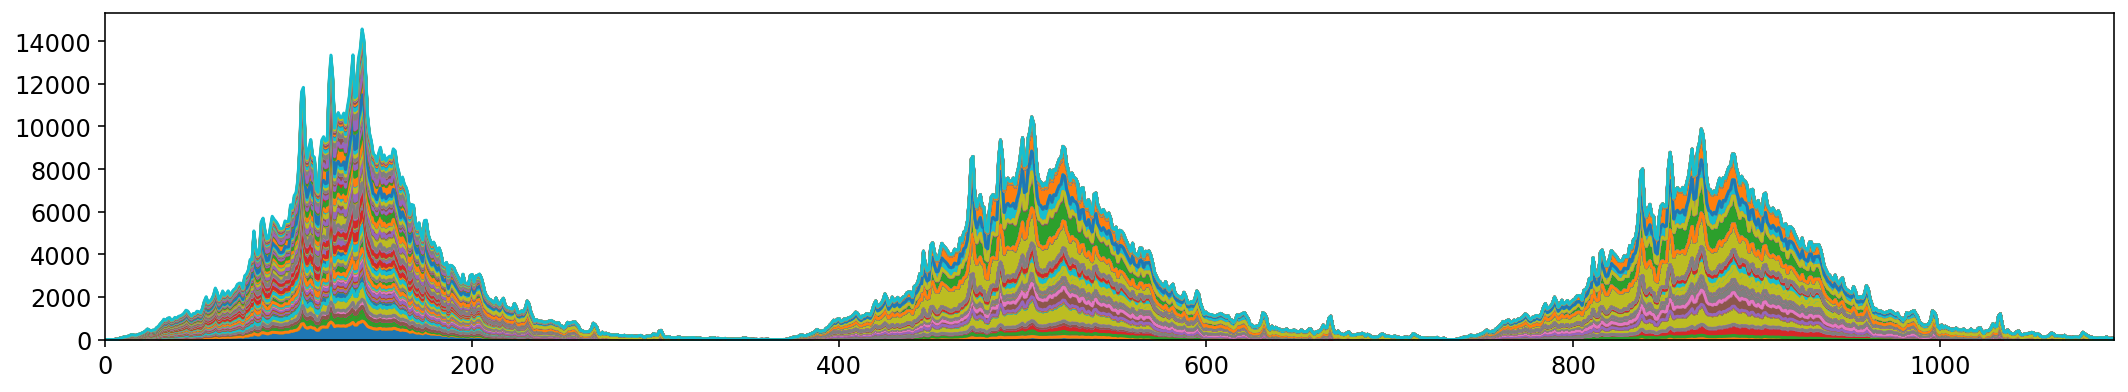

In [47]:
yield_base.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## define function of deriving data of a specific day

In [49]:
def day_data(day):
    
    day = pd.concat([enzyme_base.loc[:,str(day)], osmolyte_base.loc[:,str(day)],yield_base.loc[:,str(day)]],axis=1,sort=False)
    day.columns = ['Enzyme','Osmolyte', 'Yield']
    total = day.sum(axis=1)
    day_alive = 100*day[total>0].divide(total[total>0],axis=0)
    
    return day_alive

In [50]:
day_2_alive = day_data(2)
day_2_alive

,Enzyme,Osmolyte,Yield
Tax1,99.885153,0.114847,0.0
Tax2,99.896887,0.103113,0.0
Tax3,99.839102,0.160898,0.0
Tax4,99.364750,0.635250,0.0
Tax5,99.803638,0.196362,0.0
...,...,...,...
Tax96,99.943686,0.056314,0.0
Tax97,99.960439,0.039561,0.0
Tax98,99.905802,0.094198,0.0
Tax99,99.887596,0.112404,0.0


In [51]:
day_5_alive = day_data(5)
day_5_alive

,Enzyme,Osmolyte,Yield
Tax1,99.515971,0.484029,0.000000
Tax2,99.712836,0.287164,0.000000
Tax3,99.352607,0.647393,0.000000
Tax4,57.472884,1.698175,40.828941
Tax5,99.224923,0.775077,0.000000
...,...,...,...
Tax96,99.837217,0.162783,0.000000
Tax97,99.872590,0.127410,0.000000
Tax98,99.646871,0.353129,0.000000
Tax99,99.700782,0.299218,0.000000


## base

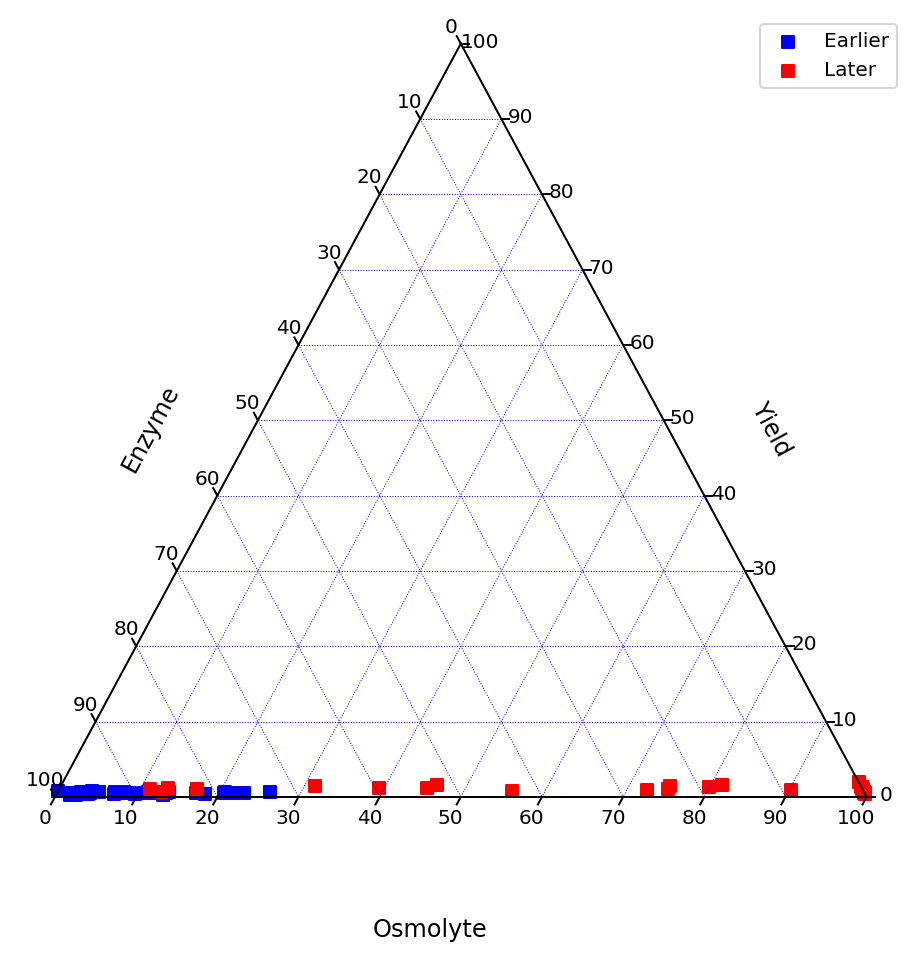

In [52]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8,8)

#tax.scatter(day_2_alive.values, marker='.', color='red', label="Red Squares")
#tax.scatter(day_5_alive.values, marker='.', color='red',label="Red Squares")
#tax.scatter(day_data(100).values, marker='.', color='orange',label="Red Squares")
#tax.scatter(day_data(150).values, marker='.', color='green',label="Red Squares")
#tax.scatter(day_data(200).values, marker='.', color='black',label="Red Squares")
tax.scatter(day_data(365*3-257).values, marker='s', color='blue',label="Earlier") # start of dry season

#tax.scatter(day_data(365*3-97).values,  marker='s', color='orange', label="Later")   # drought peak

tax.scatter(day_data(365*3-75).values,  marker='s', color='red', label="Later")   # end of dry season


tax.legend()

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

# Community-level

In [53]:
community_base = pd.concat([enzyme_base.sum(axis=0),osmolyte_base.sum(axis=0),yield_base.sum(axis=0)],axis=1,sort=False)
community_base.columns = ['Enzyme','Osmolyte', 'Yield']
total = community_base.sum(axis=1)
community_base_alive = 100*community_base[total>0].divide(total[total>0],axis=0)
community_base_alive

,Enzyme,Osmolyte,Yield
1,99.954277,0.045723,0.000000
2,99.845843,0.154157,0.000000
3,99.738252,0.261748,0.000000
4,99.573003,0.426997,0.000000
5,95.155502,0.539968,4.304530
...,...,...,...
1091,81.584957,1.122655,17.292388
1092,89.912636,1.045649,9.041715
1093,90.052199,1.035323,8.912478
1094,88.902351,1.029064,10.068585


### year-6

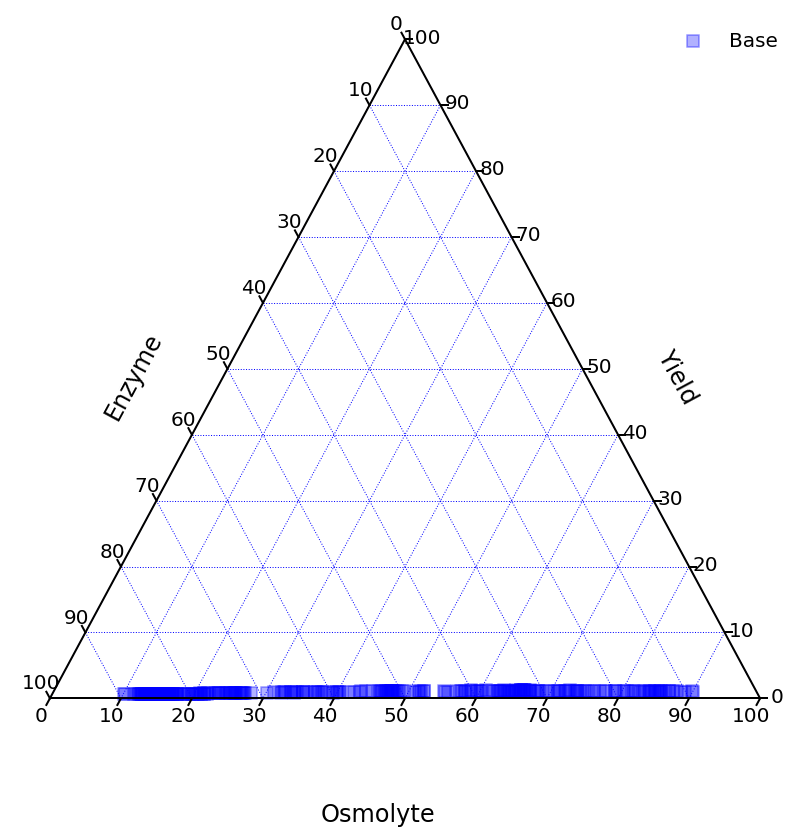

In [56]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,7)

#tax.scatter(community_basex10_alive.iloc[365*6-75:365*6-0,:].values, marker='s', color='red',label="Basex10")
#tax.scatter(community_basex4_alive.iloc[365*6-75:365*6-0,:].values, marker='s', color='green', label="Basex4",alpha=0.5)
tax.scatter(community_base_alive.iloc[365*3-275:365*3-0,:].values, marker='s', color='blue', label="Base",alpha=0.3)

tax.legend(frameon=False)

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

### year-9

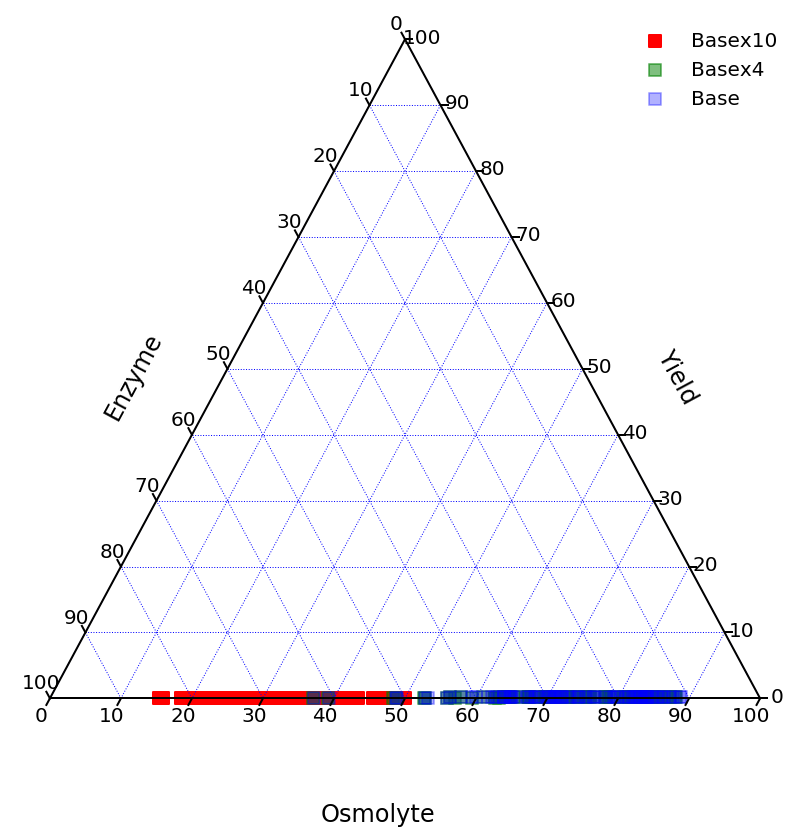

In [52]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,7)


tax.scatter(community_basex10_alive.iloc[365*9-75:365*9-0,:].values, marker='s', color='red',label="Basex10")
tax.scatter(community_basex4_alive.iloc[365*9-75:365*9-0,:].values, marker='s', color='green', label="Basex4",alpha=0.5)
tax.scatter(community_base_alive.iloc[365*9-75:365*9-0,:].values, marker='s', color='blue', label="Base", alpha=0.3)

tax.legend(frameon=False)

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()